In [1]:
%matplotlib inline
import uproot
import hist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import plotly.express as px
import seaborn as sns

In [5]:
fileDs3615 = uproot.open("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds3615_M2_3_6_MeV.root")

In [6]:
fileDs3615.keys()

['outputTree;2', 'outputTree;1', 'countsTree;2', 'countsTree;1']

In [7]:
fileDs3615['outputTree'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
channel              | int32_t                  | AsDtype('>i4')
riseTime             | double                   | AsDtype('>f8')
decayTime            | double                   | AsDtype('>f8')
delay                | double                   | AsDtype('>f8')
TVL                  | double                   | AsDtype('>f8')
TVR                  | double                   | AsDtype('>f8')
IsNear               | bool                     | AsDtype('bool')


In [8]:
tree3615 = fileDs3615['outputTree'] 

In [9]:
array3615 = tree3615.arrays(['IsNear'], library='np')

In [14]:
nearCount3615 = np.count_nonzero(array3615['IsNear'])
print(nearCount3615)

4503


In [19]:
farCount3615 = np.size(array3615['IsNear']) - np.count_nonzero(array3615['IsNear'])
print(farCount3615)

18069


In [16]:
fileArray = [uproot.open(("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds{}_M2_3_6_MeV.root".format(i))) for i in range(3601, 3616)]
treeArray = [fileArray[i]['outputTree'] for i in range(0, 15)]
arrays = [treeArray[i].arrays(['IsNear'], library='np') for i in range(0, 15)]

In [20]:
nearCounts = [np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]
farCounts = [np.size(arrays[i]['IsNear']) - np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]

In [28]:
percentages = [(nearCounts[i] * 100)/(nearCounts[i] + farCounts[i]) for i in range(0,15)]

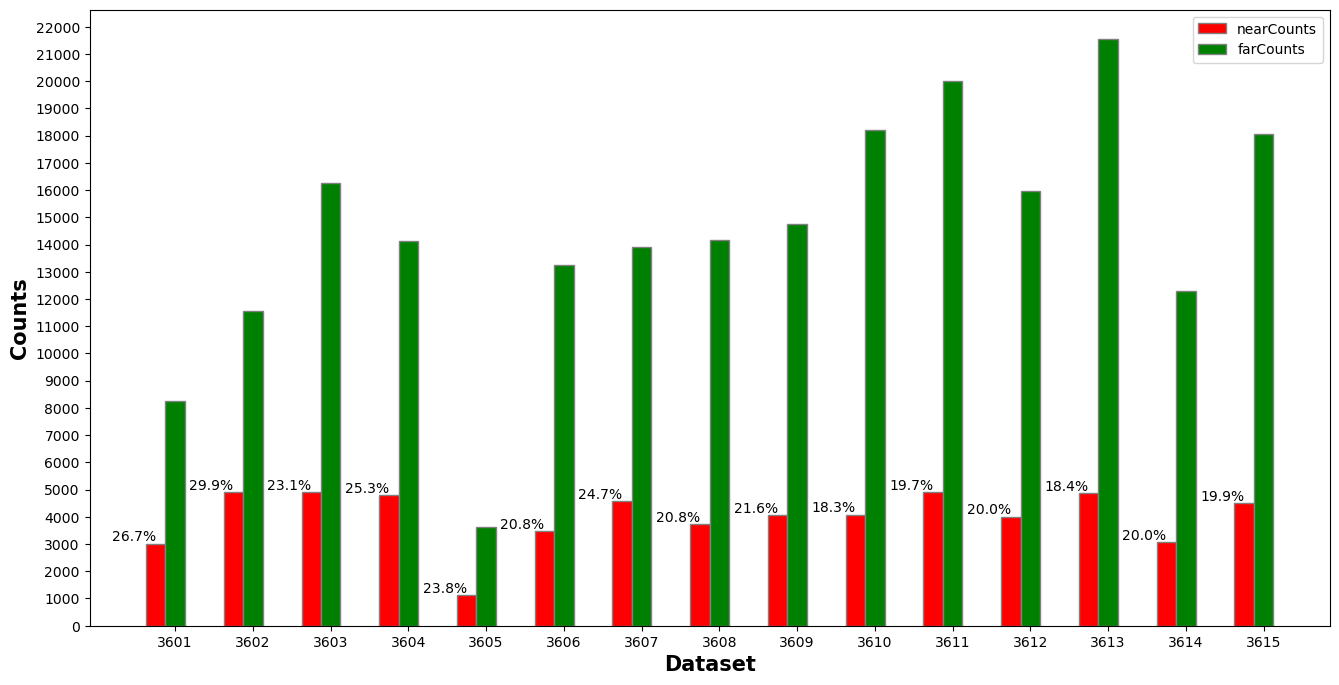

In [68]:
# set width of bar
barWidth = 0.25
fig, ax = plt.subplots(figsize =(16, 8))
 
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(nearCounts))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, nearCounts, color ='r', width = barWidth, edgecolor ='grey', label ='nearCounts')
plt.bar(br2, farCounts, color ='g', width = barWidth, edgecolor ='grey', label ='farCounts')
#plt.bar(br3, CSE, color ='b', width = barWidth,
        #edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Dataset', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len(IT))],
        #['2015', '2016', '2017', '2018', '2019'])
plt.xticks([r + barWidth for r in range(len(nearCounts))], [i for i in range(3601,3616)])
plt.yticks(np.arange(0, max(farCounts)+1000, 1000))
pairs = zip(nearCounts, percentages)
for i, values in enumerate(pairs):
    plt.text(i, values[0] + 500, f"{values[1]:.1f}%", ha='right', va='top')
#x = np.arange(15)
#pps = ax.bar(x - barWidth / 2, nearCounts, barWidth, label='Counts')
#for p in pps:
    #height = p.get_height()
    #ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10, s="{}".format(height), ha='center')
plt.legend()
plt.show()